In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error


In [11]:
df = pd.read_csv('data/Housing.csv')
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='area', ylabel='price'>

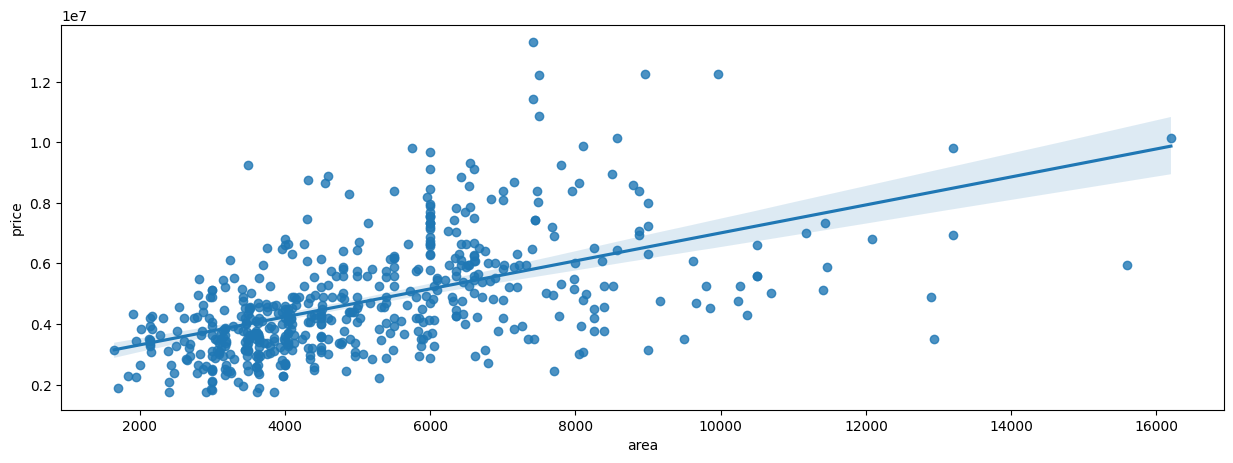

In [13]:
plt.figure(figsize=(15, 5))
sns.regplot(data = df, x='area', y='price')


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df[['area']], df[['price']], train_size=0.9, random_state=42)

In [15]:
model = linear_model.LinearRegression().fit(x_train, y_train)

In [16]:
y_pred = model.predict(x_test)

In [17]:
results = {
    'Max Error': f"{max_error(y_test, y_pred)}",
    'RMSE': f"{np.sqrt(mean_squared_error(y_test, y_pred))}",
    'MAE': f"{mean_absolute_error(y_test, y_pred)}",
    'r^2 score': f"{r2_score(y_test, y_pred)}"
}
print(results)

{'Max Error': '5348701.401765966', 'RMSE': '1692725.8887065798', 'MAE': '1398880.3464706861', 'r^2 score': '0.3833118601997828'}


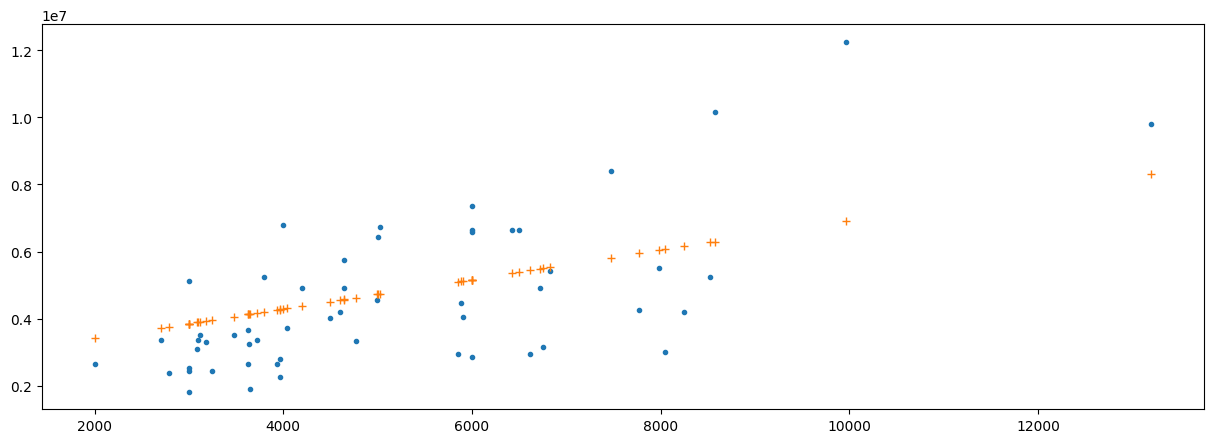

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(x_test, y_test, '.', x_test, y_pred,'+')

In [28]:
print(model.intercept_[0])
print(model.coef_[0])

2534021.9348073034
[438.48159271]
